## 1. Definition of the Business Problem

This is the foundation of the project. In this stage, we translate a company’s need into a clear objective for Data Science. We define what we want to solve (for example, automating the classification of product reviews), why it is important (to reduce costs, speed up decision-making), and how success will be measured.

### Definition

An e-commerce company wants to automate the analysis of customer feedback. Currently, the analysis is done manually, which is a slow, expensive process that doesn’t scale with the increasing volume of reviews received daily.

### Objective

Build a Machine Learning model that automatically classifies product reviews as ‘positive’ or ‘negative’.

### Expected Benefits

Efficiency: Reduce the time and cost of feedback analysis.

Fast Decision-Making: Allow product and marketing teams to quickly identify products with issues or opportunities for improvement.

Prioritization: Direct negative reviews to the customer support team with higher priority, improving the overall customer experience.

## 2. Importing the Packages

In [7]:
# Install watermark package
!pip install -q -U watermark


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Eduardo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
!pip install -U scikit-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Eduardo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
# Data manipulation and visualization
import re
import pandas as pd
import numpy as np
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [10]:
# View Configuration
sns.set_style('whitegrid')
%matplotlib inline

In [11]:
%reload_ext watermark
%watermark -a "Eduardo Data Science"

Author: Eduardo Data Science



In [12]:
%watermark --iversions

pandas    : 2.3.1
joblib    : 1.5.2
matplotlib: 3.10.7
seaborn   : 0.13.2
numpy     : 2.3.4
sklearn   : 1.7.2
re        : 2.2.1



# Loading and Undestanding dataset

In [13]:
dataset = 'sentiment.csv'

In [14]:
# Loading and understanding data
df_dse = pd.read_csv(dataset, encoding="latin-1")

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_13708\3137060405.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dse = pd.read_csv(dataset, encoding="latin-1")


In [15]:
# Shape
df_dse.shape

(171380, 6)

significa que:
-171.380 linhas → cada linha é um registro.
-6 colunas → são as variáveis que descrevem cada review.

In [16]:
# First lines
df_dse.head()

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,Useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,ok ok product,neutral


ProductPrice and Rate are numeric, the rest is text

Text pattern Some reviews have short words (“Super!”, “Nice”), others long sentences — preprocessing will need to normalize this

In [17]:
# sample dataset
df_dse.sample(10)

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
56379,Women Regular Fit White Viscose Rayon Trousers,349,4,Nan,best in market,positive
18541,Seagate One Touch with Password Protection for...,4449,5,Perfect product!,bought 5tb onetouch actual storage available 4...,positive
130323,"POCO C31 (Royal Blue, 64 GB)?ÃÂÃÂÃÂÃÂ?...",7499,5,Highly recommended,great to receive the product within 1day,positive
81225,Fab Electric Multifunction Cooking Pot 1.5 Lit...,607,3,Just okay,nicestill quality are not good but give good s...,negative
17097,"Pigeon Favourite Electric Kettle??????(1.5 L, ...",699,4,Delightful,good,positive
95200,AutoKraftZ Most Popular Sun UV Protection Arm ...,ÃÂ¢ÃÂÃÂ¹129,3,Decent product,Average quality,Neutral
110509,Men Black Sandal,299,1,Nan,very very low quality,negative
143186,TP-Link Archer C20 AC WiFi 750 MBPS Wireless R...,1599.0,5.0,Must buy!,good,positive
95073,AutoKraftZ Most Popular Sun UV Protection Arm ...,ÃÂ¢ÃÂÃÂ¹129,3,Decent product,Bad product,Negative
48979,"Men Solid Single Breasted Festive, Party, Wedd...",1839,1,Nan,very bad,negative


### 4. Exploratory Data Analysis (EDA)

In [18]:
# Info
df_dse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ProductName   171380 non-null  object
 1   ProductPrice  171379 non-null  object
 2   Rate          171379 non-null  object
 3   Review        171379 non-null  object
 4   Summary       171379 non-null  object
 5   Sentiment     171379 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


-Data type: all object (i.e. text/string)

-Tipo de dados: todos os objetos (por exemplo, texto/string)

In [19]:
print("\nChecking for missing values:\n")
print(df_dse.isnull().sum())


Checking for missing values:

ProductName     0
ProductPrice    1
Rate            1
Review          1
Summary         1
Sentiment       1
dtype: int64



Distribution of Feelings:



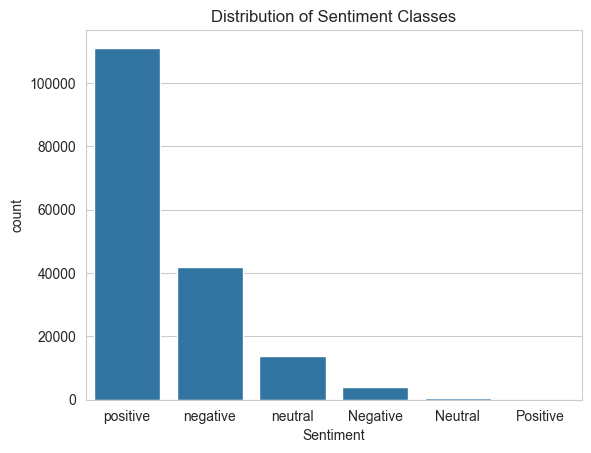

In [20]:
print("\nDistribution of Feelings:\n")
sns.countplot(x='Sentiment', data=df_dse)
plt.title('Distribution of Sentiment Classes')
plt.show()


### 5 - Data Cleaning

In [21]:
# Remover linhas com valores ausentes
print(f"\nTamanho original do DataFrame: {len(df_dse)}")
df_dse.dropna(subset=['Review'], inplace=True)
print(f"Tamanho do DataFrame após remover nulos: {len(df_dse)}")



Tamanho original do DataFrame: 171380
Tamanho do DataFrame após remover nulos: 171379


In [22]:
df_dse.shape


(171379, 6)

Normalize sentiment labels

In [23]:
# Standardize the values ​​of the 'Sentiment' column
df_dse['Sentiment'] = df_dse['Sentiment'].str.lower().str.strip()
df_dse['Sentiment'].value_counts()


Sentiment
positive    111122
negative     46119
neutral      14138
Name: count, dtype: int64

Thus, all categories are in lowercase (positive, negative, neutral).

## Convert Numeric Columns

### Currently, ProductPrice and Rate are text (object).
Convert to numeric safely:

In [24]:
df_dse['ProductPrice'] = pd.to_numeric(df_dse['ProductPrice'], errors='coerce')
df_dse['Rate'] = pd.to_numeric(df_dse['Rate'], errors='coerce')


In [25]:
df_dse.dtypes


ProductName      object
ProductPrice    float64
Rate            float64
Review           object
Summary          object
Sentiment        object
dtype: object

## Text cleaning

In [26]:

# Text cleaning function
def dse_cleaning_text(text):
    """
    Complete text cleaning function:
    1. Convert to lowercase.
    2. Remove signals and cedillas.
    3. Remove punctuation, numbers, and special characters.
    4. Remove extra spaces.
    """

    # Ensures the text is not null (if there are any NaN characters in the DataFrame)
    if not isinstance(text, str):
        return ""

    # ---- STEP 1: Normalize and remove accents ----
    # Normalize to the 'NFKD' form that separates the character from the accent mark
    # and then remove the signals (Nonspacing Mark)
    text_without_signals = ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')

    # ---- STEP 2: Cleanup with Regex ----
    # Convert to lowercase
    text_clear = text_without_signals.lower()

    # Keep only letters and spaces. signals have already been removed.
    text_clear = re.sub(r'[^a-z\s]', '', text_clear)

    # Remove extra spaces
    text_clear = re.sub(r'\s+', ' ', text_clear).strip()

    return text_clear


- Apply the function to the DataFrame

In [27]:
df_dse['Clean_Review'] = df_dse['Review'].apply(dse_cleaning_text)

This defaults all text to lowercase, no accents, no numbers, no punctuation.

Check class distribution

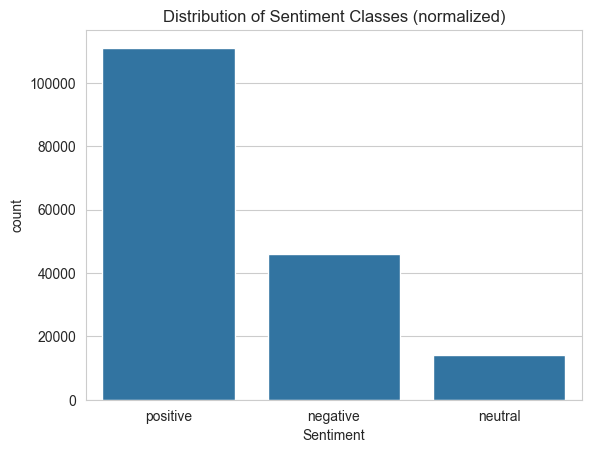

In [28]:
sns.countplot(x='Sentiment', data=df_dse)
plt.title('Distribution of Sentiment Classes (normalized)')
plt.show()


Explore text patterns

In [29]:
df_dse['text_length'] = df_dse['Clean_Review'].apply(len)
df_dse['text_length'].describe()


count    171379.000000
mean         11.220645
std           6.114572
min           0.000000
25%           8.000000
50%          10.000000
75%          15.000000
max         137.000000
Name: text_length, dtype: float64

## 6 - Feature Engineering


In [30]:
df_dse.head()

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment,Clean_Review,text_length
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,Super!,great cooler excellent air flow and for this p...,positive,super,5
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,Awesome,best budget 2 fit cooler nice cooling,positive,awesome,7
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,Fair,the quality is good but the power of air is de...,positive,fair,4
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,1.0,Useless product,very bad product its a only a fan,negative,useless product,15
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,Fair,ok ok product,neutral,fair,4


In [31]:

# Map sentiments to numeric values
df_dse['sentiment_label'] = df_dse['Sentiment'].map({'positive': 1,'negative': 0})

In [49]:
# Remove rows where sentiment_label is NaN (neutral cases)
df_dse = df_dse.dropna(subset=['sentiment_label'])

print(f"DataFrame size after removing neutrals: {len(df_dse)}")
df_dse['sentiment_label'].value_counts()


DataFrame size after removing neutrals: 157241


sentiment_label
1.0    111122
0.0     46119
Name: count, dtype: int64

In [51]:

print("\nDataFrame after mapping:")
df_dse[['Summary', 'sentiment_label','Sentiment']].head()



DataFrame after mapping:


,Summary,sentiment_label,Sentiment
0,great cooler excellent air flow and for this p...,1.0,positive
1,best budget 2 fit cooler nice cooling,1.0,positive
2,the quality is good but the power of air is de...,1.0,positive
3,very bad product its a only a fan,0.0,negative
5,the cooler is really fantastic and provides go...,1.0,positive


In [52]:
# Define features (X) and target (y)
X = df_dse['Summary']
y = df_dse['sentiment_label']

In [53]:
# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

## 7. Predictive Modeling Pipeline

In [54]:
# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um'])),
    ('scaler', StandardScaler(with_mean=False)),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))
])


### 7.1 Hyperparameter grid (lean and efficient)

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {
    'tfidf__max_features': [20000, 50000],      # tamanho do vocabulário
    'tfidf__ngram_range': [(1,1), (1,2)],       # uni/bi-gramas
    'tfidf__min_df': [2, 5],                    # filtra termos muito raros
    'tfidf__max_df': [0.9, 1.0],                # filtra termos muito frequentes
    'tfidf__use_idf': [True, False],
    'tfidf__sublinear_tf': [True],              # log-scaling no tf

    'logreg__C': [0.5, 1.0, 2.0],               # regularização
    'logreg__penalty': ['l1', 'l2'],            # com solver liblinear
    'logreg__class_weight': ['balanced']        # corrige desbalanceamento
}


In [57]:

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs = -1,
    scoring = 'accuracy',
    verbose = 1
)

### Training Model

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
